In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
import scipy as sc
sns.set()

In [2]:
#upload stroke dataset
strokes = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col=0)
strokes.iloc[0:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
strokes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [4]:
strokes.describe()
# blood sugar level more than 126 is diabetes. 
# bmi level of 30.0 and above is obese.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# 201 bmi missing values
strokes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
strokes['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
# 40 out of 249 observations with stroke have missing bmi value
strokes[(strokes['stroke']==1) & (strokes['bmi'].isnull())].shape[0]

40

In [8]:
40/249

0.1606425702811245

In [9]:
# filling missing values with median to not lose observations with stroke
strokes['bmi']=strokes['bmi'].fillna(strokes['bmi'].median())

In [10]:
# 1 gender which is not male or female (does not have strike), deleting this observation
strokes['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
strokes[strokes['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [12]:
strokes = strokes.drop(strokes[strokes['gender']=='Other'].index) # 1 other

In [13]:
#strokes.drop(['work_type','smoking_status'], axis=1, inplace=True)

In [14]:
strokes[strokes['age'] < 2].sort_values(by='age').head(5) # babies below 2 years have month specified

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0


<AxesSubplot:xlabel='age', ylabel='Density'>

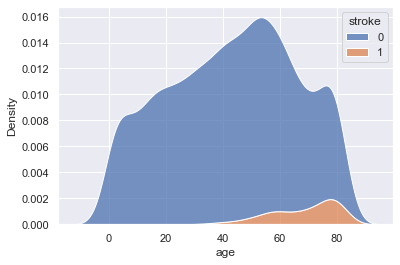

In [15]:
sns.kdeplot(data=strokes, x="age", hue="stroke", multiple="stack") # The older you are the higher chance of stroke

In [16]:
strokes['bmi'].sort_values().tail(10)

id
65895    61.2
72784    61.6
20292    63.3
70670    64.4
66333    64.8
37759    66.8
545      71.9
41097    78.0
51856    92.0
56420    97.6
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi'>

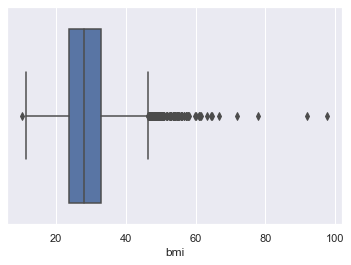

In [17]:
sns.boxplot(x=strokes['bmi']) 

In [18]:
strokes[strokes['bmi']>70] # 4 values recognized as outliers, none had stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [19]:
strokes = strokes[strokes['bmi']<70] # deleting outliers

<AxesSubplot:xlabel='bmi', ylabel='Density'>

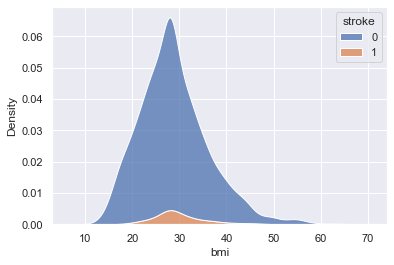

In [20]:
# biggest threat of stroke seems to face overweight and obese people
sns.kdeplot(data=strokes, x="bmi", hue="stroke", multiple="stack") 

<AxesSubplot:xlabel='avg_glucose_level'>

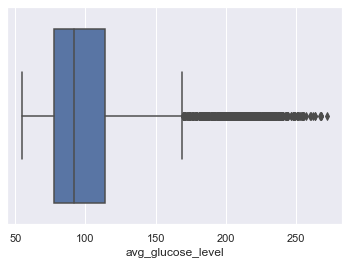

In [21]:
sns.boxplot(x=strokes['avg_glucose_level']) # avg_glucose_lvl seems not to have outliers

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

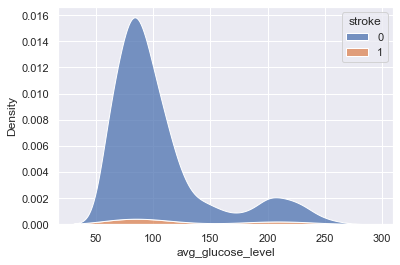

In [22]:
# evenly distributed with slighlty more strokes for high level of glucose
sns.kdeplot(data=strokes, x="avg_glucose_level", hue="stroke", multiple="stack") 

In [23]:
strokes['hypertension'].value_counts() # no weird values

0    4610
1     495
Name: hypertension, dtype: int64

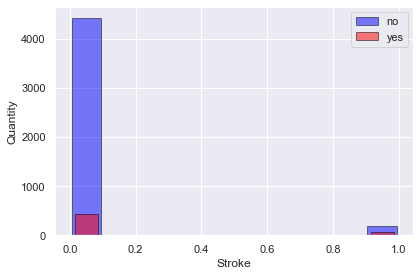

In [24]:
plt.hist(strokes[strokes['hypertension']==0]['stroke'], edgecolor='black',color='blue',rwidth=0.9,alpha=0.5,label='no')
plt.hist(strokes[strokes['hypertension']==1]['stroke'], edgecolor='black',color='red',rwidth=0.7,alpha=0.5,label='yes')

# stroke values seem to be evenly distributed into hypertension

plt.legend(loc='upper right') 
plt.xlabel('Stroke')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

In [25]:
strokes[strokes['hypertension']==0]['stroke'].value_counts()

0    4427
1     183
Name: stroke, dtype: int64

In [26]:
strokes[strokes['hypertension']==1]['stroke'].value_counts()

0    429
1     66
Name: stroke, dtype: int64

In [27]:
183/4427

0.04133724870115202

In [28]:
66/429  # 15% people with hypertension observed had stroke but only 4% without did not have stroke

0.15384615384615385

In [29]:
strokes['work_type'].value_counts()  # no weird values

Private          2920
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:>

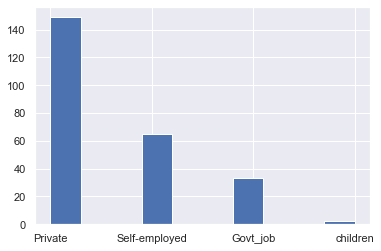

In [30]:
strokes[strokes['stroke']==1]['work_type'].hist() # most people with stroke work in private companies or are self_employed

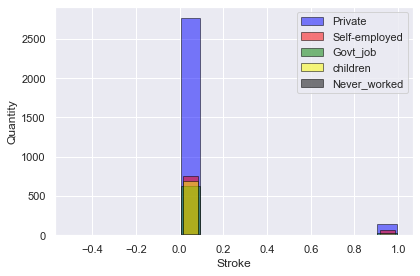

In [31]:
plt.hist(strokes[strokes['work_type']=='Private']['stroke'], edgecolor='black',color='blue',rwidth=0.9,alpha=0.5,label='Private')
plt.hist(strokes[strokes['work_type']=='Self-employed']['stroke'], edgecolor='black',color='red',rwidth=0.7,alpha=0.5,label='Self-employed')
plt.hist(strokes[strokes['work_type']=='Govt_job']['stroke'], edgecolor='black',color='green',rwidth=0.9,alpha=0.5,label='Govt_job')
plt.hist(strokes[strokes['work_type']=='children']['stroke'], edgecolor='black',color='yellow',rwidth=0.7,alpha=0.5,label='children')
plt.hist(strokes[strokes['work_type']=='Never_worked']['stroke'], edgecolor='black',color='black',rwidth=0.9,alpha=0.5,label='Never_worked')

plt.legend(loc='upper right') 
plt.xlabel('Stroke')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

In [32]:
strokes['Residence_type'].value_counts() # no weird values as well

Urban    2595
Rural    2510
Name: Residence_type, dtype: int64

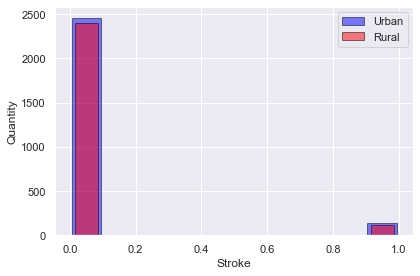

In [33]:
plt.hist(strokes[strokes['Residence_type']=='Urban']['stroke'], edgecolor='black',color='blue',rwidth=0.9,alpha=0.5,label='Urban')
plt.hist(strokes[strokes['Residence_type']=='Rural']['stroke'], edgecolor='black',color='red',rwidth=0.7,alpha=0.5,label='Rural')

# stroke values are evenly distributed in Urban and Rural

plt.legend(loc='upper right') 
plt.xlabel('Stroke')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

In [34]:
strokes['smoking_status'].value_counts() # Unknown vales - mostly underage but cannot judge if all never smoked

never smoked       1890
Unknown            1543
formerly smoked     884
smokes              788
Name: smoking_status, dtype: int64

Text(0, 0.5, 'Quantity')

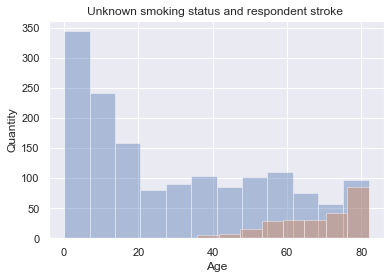

In [35]:
# most people without known smoking status had stroke after are older than 40 years
sns.distplot(strokes[strokes['smoking_status']=='Unknown']['age'], kde=False)
sns.distplot(strokes[strokes['stroke']==1]['age'], kde=False)

plt.title('Unknown smoking status and respondent stroke ')
plt.xlabel('Age')
plt.ylabel('Quantity')

In [36]:
# replacing string texts with binary values
strokes.replace({'gender': {"Male": 0, "Female": 1}, 'Residence_type': {"Urban": 0, "Rural": 1}, 
                 'ever_married': {"No": 0, "Yes": 1}}, inplace=True)
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,1,202.21,28.1,never smoked,1
31112,0,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1


In [37]:
# dummy variables for work_type and smoking_status columns
strokes_cat = pd.get_dummies(strokes, columns=['work_type','smoking_status'])
strokes_cat.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,
9046,0,67.0,0,1,1,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
51676,1,61.0,0,0,1,1,202.21,28.1,1,0,0,0,1,0,0,0,1,0
31112,0,80.0,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
60182,1,49.0,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
1665,1,79.0,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [38]:
strokes_cat.drop('smoking_status_Unknown', axis=1, inplace=True) # droping Unknown smoking_status

In [39]:
strokes_cat = strokes_cat.reset_index(drop = True)

In [40]:
# normalizing continous variables
strokes_cat['age'] = (strokes_cat['age']-strokes_cat['age'].min())/(strokes_cat['age'].max()-strokes_cat['age'].min())
strokes_cat['avg_glucose_level'] = (strokes_cat['avg_glucose_level']-strokes_cat['avg_glucose_level'].min())/(strokes_cat['avg_glucose_level'].max()-strokes_cat['avg_glucose_level'].min())
strokes_cat['bmi'] = (strokes_cat['bmi']-strokes_cat['bmi'].min())/(strokes_cat['bmi'].max()-strokes_cat['bmi'].min())

In [41]:
strokes.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000
mean,0.586288,43.240353,0.096964,0.054065,0.656415,0.491675,106.145391,28.819412,0.048776
std,0.492546,22.617555,0.295937,0.226167,0.474951,0.499980,45.266850,7.535821,0.215420
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.280000,23.800000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,91.890000,28.100000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,66.800000,1.000000


In [42]:
strokes_cat.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000
mean,0.586288,0.526860,0.096964,0.054065,0.656415,0.491675,0.235553,0.327777,0.048776,0.128697,0.004310,0.571988,0.160431,0.134574,0.173164,0.370225,0.154358
std,0.492546,0.276093,0.295937,0.226167,0.474951,0.499980,0.208969,0.133377,0.215420,0.334897,0.065512,0.494839,0.367041,0.341301,0.378426,0.482912,0.361327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.102299,0.238938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.548340,0.000000,0.000000,1.000000,0.000000,0.169744,0.315044,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.743652,0.000000,0.000000,1.000000,1.000000,0.272228,0.398230,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Almost 60% of patients are women. \
Mean age is 43 years, children younger than 2 years have their month of life registered.\
There are 10% of patients with registered hypertension and about 5% with heart diseases.\
Half of patients live in rural areas, the other half lives in urban.\
First 3 quartiles have avg glucose level below 114, then after about 200 there is a small increase in observations\
More than a half patients work as private.\
40% never smoked. the rest smoked or is unknown(1482)

Only 5% of observations are patients with registered stroke.


In [43]:
5105/5110 # observations left for dataset without nulls

0.9990215264187867

In [44]:
x = strokes_cat.loc[:, strokes_cat.columns != 'stroke']
x_lin = strokes_cat[['age','bmi','avg_glucose_level']]
x_lin.head()

,age,bmi,avg_glucose_level
0,0.816895,0.465487,0.801265
1,0.743652,0.315044,0.679023
2,0.975586,0.392920,0.234512
3,0.597168,0.426549,0.536008
4,0.963379,0.242478,0.549349


In [45]:
y = strokes_cat["stroke"].to_numpy()
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0.816895,0,1,1,0,0.801265,0.465487,0,0,1,0,0,1,0,0
1,1,0.743652,0,0,1,1,0.679023,0.315044,0,0,0,1,0,0,1,0
2,0,0.975586,0,1,1,1,0.234512,0.392920,0,0,1,0,0,0,1,0
3,1,0.597168,0,0,1,0,0.536008,0.426549,0,0,1,0,0,0,0,1
4,1,0.963379,1,0,1,1,0.549349,0.242478,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,1,0.975586,1,0,1,0,0.132167,0.315044,0,0,1,0,0,0,1,0
5101,1,0.987793,0,0,1,0,0.323516,0.525664,0,0,0,1,0,0,1,0
5102,1,0.426270,0,0,1,1,0.128658,0.359292,0,0,0,1,0,0,1,0
5103,0,0.621582,0,0,1,1,0.513203,0.270796,0,0,1,0,0,1,0,0


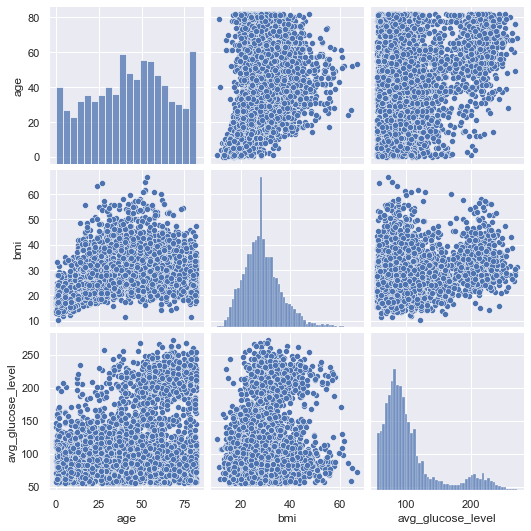

In [47]:
x0_lin = strokes[['age','bmi','avg_glucose_level']]
sns.pairplot(x0_lin)
plt.show()

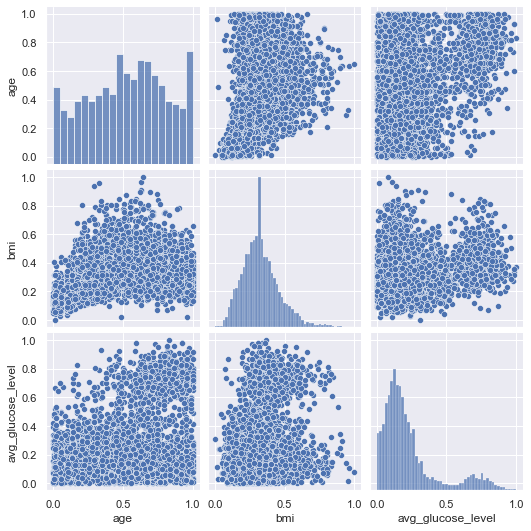

In [48]:
sns.pairplot(x_lin)
plt.show()

In [49]:
corr_P = x.corr("pearson")
#correlation coefficient bigger than 0.5
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()

corr_P_tri[abs(corr_P_tri)>0.5]

age                work_type_children        -0.634676
ever_married       work_type_children        -0.545052
work_type_Private  work_type_Self-employed   -0.505338
age                ever_married               0.679039
dtype: float64

In [50]:
#pip install pandas-profiling[notebook]

In [51]:
#from pandas_profiling import ProfileReport

In [52]:
#profile = ProfileReport(strokes_no_nan_cat)
#profile.to_file(output_file="output.html")

In [53]:
y[y==1][:200].shape[0] # stroke observations are first (not randomly distributed)

200

In [54]:
from sklearn.model_selection import train_test_split
X_ucz, X_test, y_ucz, y_test = train_test_split(x, y, test_size= 0.2, random_state=12345)

In [55]:
y_test[y_test==1].shape[0]

57

In [56]:
y_test[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
# oversampling for more stroke = 1 values
sm = SMOTE(random_state=1)
X_ucz_res, y_ucz_res = sm.fit_resample(X_ucz, y_ucz.ravel())

In [58]:
y_ucz_res.shape[0]

7784

Model comparison

In [59]:
def fit_classifier(alg, X_ucz, X_test, y_ucz, y_test):
      
    alg.fit(X_ucz, y_ucz)
    y_pred_ucz = alg.predict(X_ucz)
    y_pred_test = alg.predict(X_test)
    return {
        "ACC_ucz": sklearn.metrics.accuracy_score(y_ucz, y_pred_ucz),
        "ACC_test": sklearn.metrics.accuracy_score(y_test, y_pred_test),
        "P_ucz":   sklearn.metrics.precision_score(y_ucz, y_pred_ucz),
        "P_test":   sklearn.metrics.precision_score(y_test, y_pred_test),
        "R_ucz":   sklearn.metrics.recall_score(y_ucz, y_pred_ucz),
        "R_test":   sklearn.metrics.recall_score(y_test, y_pred_test),
        "F1_ucz":  sklearn.metrics.f1_score(y_ucz, y_pred_ucz),
        "F1_test":  sklearn.metrics.f1_score(y_test, y_pred_test),
        "ROC_ucz":  sklearn.metrics.roc_auc_score(y_ucz, y_pred_ucz),
        "ROC_test":  sklearn.metrics.roc_auc_score(y_test, y_pred_test)
    }

In [60]:
from sklearn.tree import DecisionTreeClassifier
params = ["tree"]
res = [fit_classifier(DecisionTreeClassifier(),
                      X_ucz_res, X_test, y_ucz_res, y_test)]
df_results = pd.DataFrame(res, index=params)

In [61]:
df_results

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.0,0.830558,1.0,0.108108,1.0,0.280702,1.0,0.156098,1.0,0.571886


In [62]:
from sklearn.ensemble import RandomForestClassifier
params.append("forest")
res.append(fit_classifier(RandomForestClassifier(),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)


In [63]:
df_results

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.0,0.830558,1.0,0.108108,1.0,0.280702,1.0,0.156098,1.0,0.571886
forest,1.0,0.867777,1.0,0.125000,1.0,0.228070,1.0,0.161491,1.0,0.566836


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
params.append("knn")
res.append(fit_classifier(KNeighborsClassifier(),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)

In [66]:
df_results

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.0000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.0000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.9256,0.138996,0.920735,0.562459


In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
params.append("MLP")
res.append(fit_classifier(MLPClassifier(),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)

In [69]:
df_results

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.000000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.000000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.925600,0.138996,0.920735,0.562459
MLP,0.876028,0.805093,0.842019,0.130208,0.925745,0.438596,0.881899,0.200803,0.876028,0.632680


In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
params.append("log_reg")
res.append(fit_classifier(LogisticRegression(),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)

In [72]:
df_results

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.000000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.000000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.925600,0.138996,0.920735,0.562459
MLP,0.876028,0.805093,0.842019,0.130208,0.925745,0.438596,0.881899,0.200803,0.876028,0.632680
log_reg,0.795092,0.749265,0.765549,0.150877,0.850719,0.754386,0.805890,0.251462,0.795092,0.751674


In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
params.append("ada")
res.append(fit_classifier(AdaBoostClassifier(),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)

In [75]:
df_results 

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.000000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.000000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.925600,0.138996,0.920735,0.562459
MLP,0.876028,0.805093,0.842019,0.130208,0.925745,0.438596,0.881899,0.200803,0.876028,0.632680
log_reg,0.795092,0.749265,0.765549,0.150877,0.850719,0.754386,0.805890,0.251462,0.795092,0.751674
ada,0.805627,0.747307,0.772759,0.134545,0.865879,0.649123,0.816673,0.222892,0.805627,0.701117


In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
params.append("Gboost")
res.append(fit_classifier(GradientBoostingClassifier(),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)

In [78]:
df_results # logistic regression seems to be the best

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.000000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.000000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.925600,0.138996,0.920735,0.562459
MLP,0.876028,0.805093,0.842019,0.130208,0.925745,0.438596,0.881899,0.200803,0.876028,0.632680
log_reg,0.795092,0.749265,0.765549,0.150877,0.850719,0.754386,0.805890,0.251462,0.795092,0.751674
ada,0.805627,0.747307,0.772759,0.134545,0.865879,0.649123,0.816673,0.222892,0.805627,0.701117
Gboost,0.859841,0.774731,0.826838,0.125541,0.910329,0.508772,0.866577,0.201389,0.859841,0.649614


In [79]:
from sklearn.ensemble import RandomForestClassifier
params.append("forest_tuned")
res.append(fit_classifier(RandomForestClassifier(max_depth=23,max_features=14,max_leaf_nodes=133,min_samples_leaf=1),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)
df_results 

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.000000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.000000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.925600,0.138996,0.920735,0.562459
MLP,0.876028,0.805093,0.842019,0.130208,0.925745,0.438596,0.881899,0.200803,0.876028,0.632680
log_reg,0.795092,0.749265,0.765549,0.150877,0.850719,0.754386,0.805890,0.251462,0.795092,0.751674
ada,0.805627,0.747307,0.772759,0.134545,0.865879,0.649123,0.816673,0.222892,0.805627,0.701117
Gboost,0.859841,0.774731,0.826838,0.125541,0.910329,0.508772,0.866577,0.201389,0.859841,0.649614
forest_tuned,0.929214,0.819785,0.902821,0.149171,0.961973,0.473684,0.931459,0.226891,0.929214,0.656967


In [80]:
params.append("log_reg_tuned")
res.append(fit_classifier(LogisticRegression(max_iter=35, C = 206.9),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)

In [81]:
df_results 

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.000000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.000000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.925600,0.138996,0.920735,0.562459
MLP,0.876028,0.805093,0.842019,0.130208,0.925745,0.438596,0.881899,0.200803,0.876028,0.632680
log_reg,0.795092,0.749265,0.765549,0.150877,0.850719,0.754386,0.805890,0.251462,0.795092,0.751674
ada,0.805627,0.747307,0.772759,0.134545,0.865879,0.649123,0.816673,0.222892,0.805627,0.701117
Gboost,0.859841,0.774731,0.826838,0.125541,0.910329,0.508772,0.866577,0.201389,0.859841,0.649614
forest_tuned,0.929214,0.819785,0.902821,0.149171,0.961973,0.473684,0.931459,0.226891,0.929214,0.656967
log_reg_tuned,0.795349,0.750245,0.765780,0.148936,0.850976,0.736842,0.806134,0.247788,0.795349,0.743940


In [82]:
params.append("ada_tuned")
res.append(fit_classifier(AdaBoostClassifier(n_estimators=450),
                          X_ucz_res, X_test, y_ucz_res, y_test))
df_results = pd.DataFrame(res, index=params)
df_results 
#even after tuning, base regression model is the best

,ACC_ucz,ACC_test,P_ucz,P_test,R_ucz,R_test,F1_ucz,F1_test,ROC_ucz,ROC_test
tree,1.000000,0.830558,1.000000,0.108108,1.000000,0.280702,1.000000,0.156098,1.000000,0.571886
forest,1.000000,0.867777,1.000000,0.125000,1.000000,0.228070,1.000000,0.161491,1.000000,0.566836
knn,0.920735,0.781587,0.872075,0.089109,0.986125,0.315789,0.925600,0.138996,0.920735,0.562459
MLP,0.876028,0.805093,0.842019,0.130208,0.925745,0.438596,0.881899,0.200803,0.876028,0.632680
log_reg,0.795092,0.749265,0.765549,0.150877,0.850719,0.754386,0.805890,0.251462,0.795092,0.751674
ada,0.805627,0.747307,0.772759,0.134545,0.865879,0.649123,0.816673,0.222892,0.805627,0.701117
Gboost,0.859841,0.774731,0.826838,0.125541,0.910329,0.508772,0.866577,0.201389,0.859841,0.649614
forest_tuned,0.929214,0.819785,0.902821,0.149171,0.961973,0.473684,0.931459,0.226891,0.929214,0.656967
log_reg_tuned,0.795349,0.750245,0.765780,0.148936,0.850976,0.736842,0.806134,0.247788,0.795349,0.743940
ada_tuned,0.843654,0.769833,0.814336,0.141129,0.890288,0.614035,0.850620,0.229508,0.843654,0.696540


In [83]:
dt = sklearn.tree.DecisionTreeClassifier()
forest = sklearn.ensemble.RandomForestClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
reg = LogisticRegression()


dt.fit(X_ucz_res, y_ucz_res)
forest.fit(X_ucz_res, y_ucz_res)
knn.fit(X_ucz_res, y_ucz_res)
mlp.fit(X_ucz_res, y_ucz_res)
reg.fit(X_ucz_res, y_ucz_res)


LogisticRegression()

In [84]:
y_pred_ucz = dt.predict(X_ucz_res)
y_pred_test = dt.predict(X_test)
y_pred_ucz_reg = reg.predict(X_ucz_res)
y_pred_test_reg = reg.predict(X_test)
y_pred_ucz_forest = forest.predict(X_ucz_res)
y_pred_test_forest = forest.predict(X_test)
y_pred_ucz_knn = knn.predict(X_ucz_res)
y_pred_test_knn = knn.predict(X_test)
y_pred_ucz_mlp = mlp.predict(X_ucz_res)
y_pred_test_mlp = mlp.predict(X_test)

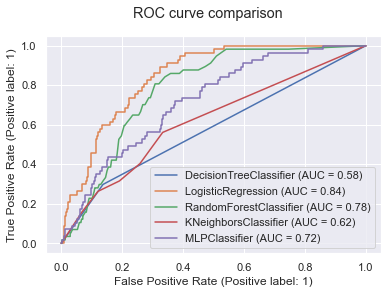

In [85]:
# test set ROC-AUC

import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection

dt_disp = metrics.plot_roc_curve(dt, X_test, y_test)
reg_disp = metrics.plot_roc_curve(reg, X_test, y_test, ax=dt_disp.ax_)
forest_disp = metrics.plot_roc_curve(forest, X_test, y_test, ax=dt_disp.ax_)
knn_disp = metrics.plot_roc_curve(knn, X_test, y_test, ax=dt_disp.ax_)
mlp_disp = metrics.plot_roc_curve(mlp, X_test, y_test, ax=dt_disp.ax_)

knn_disp.figure_.suptitle("ROC curve comparison")
mlp_disp.figure_.suptitle("ROC curve comparison")
reg_disp.figure_.suptitle("ROC curve comparison")
forest_disp.figure_.suptitle("ROC curve comparison")
plt.show()

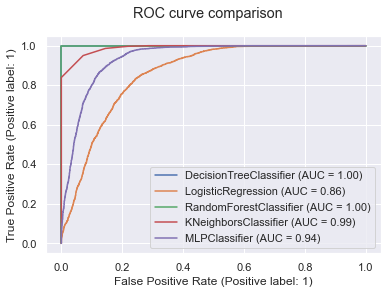

In [86]:
# train set ROC-AUC

dt_disp = metrics.plot_roc_curve(dt, X_ucz_res, y_ucz_res)
reg_disp = metrics.plot_roc_curve(reg, X_ucz_res, y_ucz_res, ax=dt_disp.ax_)
forest_disp = metrics.plot_roc_curve(forest, X_ucz_res, y_ucz_res, ax=dt_disp.ax_)
knn_disp = metrics.plot_roc_curve(knn, X_ucz_res, y_ucz_res, ax=dt_disp.ax_)
mlp_disp = metrics.plot_roc_curve(mlp, X_ucz_res, y_ucz_res, ax=dt_disp.ax_)

knn_disp.figure_.suptitle("ROC curve comparison")
mlp_disp.figure_.suptitle("ROC curve comparison")
reg_disp.figure_.suptitle("ROC curve comparison")
forest_disp.figure_.suptitle("ROC curve comparison")
plt.show()

Hiperparameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV


parameters = {'max_iter': list(range(10,101,5)), 'C' : np.logspace(-4, 4, 20)}
clf = GridSearchCV(LogisticRegression(), parameters, n_jobs=4,scoring='f1')
clf.fit(X=X_ucz_res, y=y_ucz_res)
reg_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.805914955262149 {'C': 206.913808111479, 'max_iter': 80}


In [88]:
parameters = {'max_depth':range(16,25), 'n_estimators': list(range(40,151,10))}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4,scoring='f1')
clf.fit(X=X_ucz_res, y=y_ucz_res)
forest_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.934260591935131 {'max_depth': 24, 'n_estimators': 100}


In [89]:
parameters = {'n_estimators':list(range(200,451,10))}
clf = GridSearchCV(AdaBoostClassifier(), parameters, n_jobs=4,scoring='f1')
clf.fit(X=X_ucz_res, y=y_ucz_res)
forest_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.834524499426012 {'n_estimators': 450}


In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
forest = sklearn.ensemble.RandomForestClassifier()
dt = sklearn.tree.DecisionTreeClassifier()
reg = LogisticRegression()
reg_tuned = LogisticRegression(max_iter=35, C = 206.9)

In [92]:
cross_val_score(dt,X_ucz_res,y_ucz_res,scoring='f1')

array([0.86046512, 0.89380531, 0.87291399, 0.88430269, 0.9003736 ])

In [93]:
cross_val_score(forest,X_ucz_res,y_ucz_res,scoring='f1')

array([0.92518703, 0.93325016, 0.93366708, 0.93046154, 0.93622291])

In [94]:
cross_val_score(reg_tuned,X_ucz_res,y_ucz_res,scoring='f1')

array([0.79560708, 0.81230769, 0.80643166, 0.80776228, 0.8043088 ])

In [95]:
cross_val_score(reg,X_ucz_res,y_ucz_res,scoring='f1')

array([0.79756839, 0.80984615, 0.80519481, 0.80338778, 0.80334728])

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [97]:
confusion_matrix(y_test, y_pred_test_reg)

array([[722, 242],
       [ 14,  43]], dtype=int64)

In [98]:
confusion_matrix(y_test, y_pred_test)

array([[832, 132],
       [ 40,  17]], dtype=int64)

In [99]:
confusion_matrix(y_test, y_pred_test_forest)

array([[872,  92],
       [ 44,  13]], dtype=int64)

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, y_pred_test_reg))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       964
           1       0.15      0.75      0.25        57

    accuracy                           0.75      1021
   macro avg       0.57      0.75      0.55      1021
weighted avg       0.93      0.75      0.82      1021



In [102]:
forest.fit(X_ucz_res,y_ucz_res)

RandomForestClassifier()

In [103]:
#each column importance for random forest
pd.Series(forest.feature_importances_, index = x.columns).sort_values(ascending=False)

age                               0.420165
avg_glucose_level                 0.177049
bmi                               0.170775
ever_married                      0.033267
Residence_type                    0.023606
smoking_status_never smoked       0.021944
gender                            0.021418
work_type_children                0.019217
hypertension                      0.018593
smoking_status_formerly smoked    0.017100
work_type_Self-employed           0.017000
smoking_status_smokes             0.015694
work_type_Private                 0.015243
work_type_Govt_job                0.014473
heart_disease                     0.014145
work_type_Never_worked            0.000311
dtype: float64

In [104]:
strokes[strokes['ever_married']==1]['stroke'].value_counts()

0    3131
1     220
Name: stroke, dtype: int64

In [105]:
strokes[strokes['ever_married']==0]['stroke'].value_counts()

0    1725
1      29
Name: stroke, dtype: int64

In [106]:
220/3131 # 7% people that have been married had stroke

0.07026509102523155

In [107]:
29/1725 # 2% people that never got married had stroke

0.01681159420289855

In [108]:
strokes[strokes['gender']==1]['stroke'].value_counts()

0    2852
1     141
Name: stroke, dtype: int64

In [109]:
strokes[strokes['gender']==0]['stroke'].value_counts()

0    2004
1     108
Name: stroke, dtype: int64

In [110]:
141/2852

0.04943899018232819

In [111]:
108/2004 # strokes are almost evenly distributed between gender

0.05389221556886228

In [112]:
strokes[strokes['Residence_type']==1]['stroke'].value_counts()

0    2396
1     114
Name: stroke, dtype: int64

In [113]:
strokes[strokes['Residence_type']==0]['stroke'].value_counts()

0    2460
1     135
Name: stroke, dtype: int64

In [114]:
114/2396

0.04757929883138564

In [115]:
135/2460 # Residence type same as gender

0.054878048780487805

In [116]:
dt.fit(X_ucz_res, y_ucz_res)

DecisionTreeClassifier()

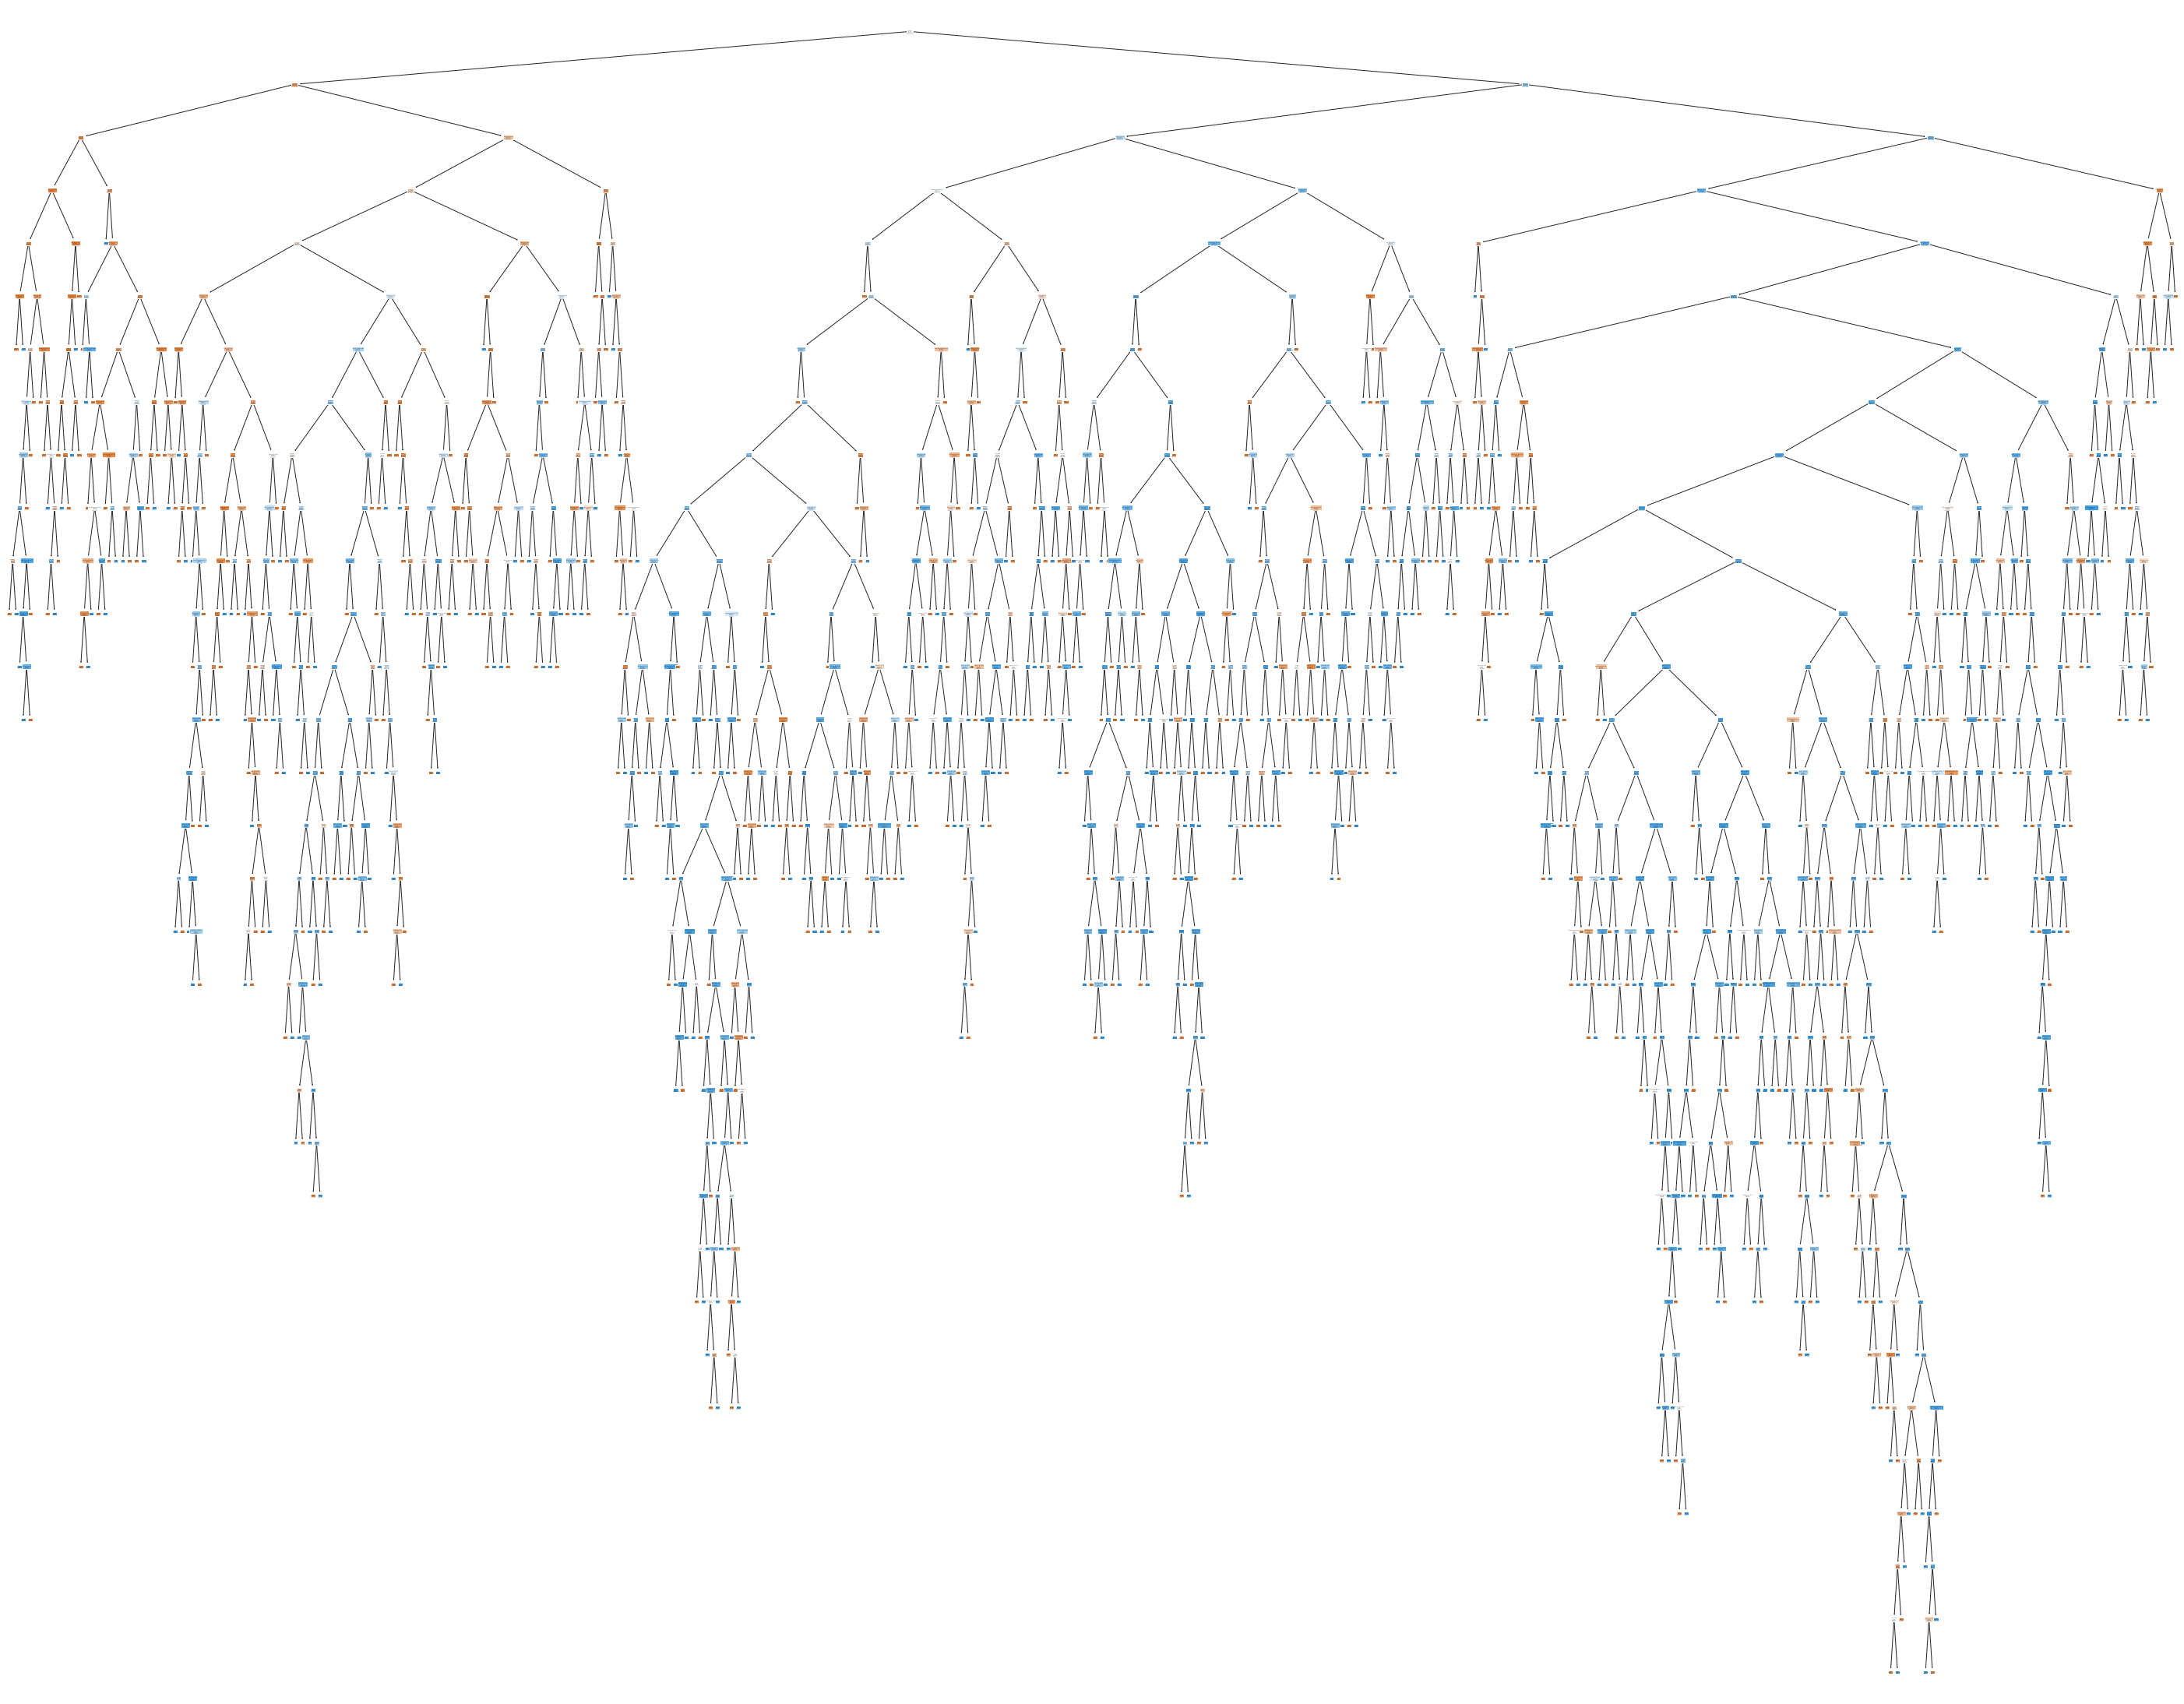

In [119]:
from sklearn import tree
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(dt, feature_names=x.columns,
                   filled=True)
#plt.savefig('tree')